In [5]:
from anyBSM.plotting import ScanParameter, Plotting, setAnyStyle
import anyBSM.plotting as plotting
plotting.anyLogo = {'resize': False, 'show': False, 'alpha': 0.4, 'zorder': 0, 'loc': 'upper left'}
from anyBSM import anyBSM
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
mpl.rcParams['font.size']   = 12.0

In [2]:
N2HDM = anyBSM('NTHDM', scheme_name="OS", quiet=True,ask=False)
THDM = anyBSM('THDMII', scheme_name = "OSalignment", quiet=True)
SM=anyBSM('SM', scheme_name = "OS", quiet=True)

In [3]:
lamSMtree=SM.lambdahhh()['treelevel']

def kappalamN2HDM(Q,Mh1,Mh2,Mh3,MA,MHp,M12,vs,tb,a1,a2,a3):
    N2HDM.setparameters({'Qren':Q,'Mh1':Mh1,'Mh2':Mh2,'Mh3':Mh3,'MAh2':MA,'MHm2':MHp,'M12':M12,'vS':vs,'TanBeta':tb,'alpha1':a1,'alpha2':a2,'alpha3':a3})
    return (N2HDM.lambdahhh()['total']/lamSMtree,N2HDM.lambdahhh()['treelevel']/lamSMtree)

def lam2HDM(Q,Mh2,MA,MHp,M,tb,a):
    THDM.setparameters({'Mh2':Mh2,'MAh2':MA,'MHm2':MHp,'M':M,'TanBeta':tb,'SinBmA':np.sin(np.arctan(tb)-a)})
    return THDM.lambdahhh()


def kappatN2HDM(Q,Mh1,Mh2,Mh3,MA,MHp,M12,vs,tb,a1,a2,a3):
    N2HDM.setparameters({'Qren':Q,'Mh1':Mh1,'Mh2':Mh2,'Mh3':Mh3,'MAh2':MA,'MHm2':MHp,'M12':M12,'vS':vs,'TanBeta':tb,'alpha1':a1,'alpha2':a2,'alpha3':a3})
    return N2HDM.getcoupling('h2','u3','u3bar')['L'].nvalue/SM.getcoupling('h','u3','u3bar')['L'].nvalue

In [4]:
tb=2
a2val=np.linspace(0,np.pi/2,100)

kappalampt1=np.array([kappalamN2HDM(300,300.05,125.1,300,300,300,100**2/2*np.sin(2*np.arctan(tb)),300,tb,np.arctan(tb)/2+0.2,a2,np.arctan(tb)/2-np.pi/2-0.2) for a2 in a2val])
kappalampt2=np.array([kappalamN2HDM(300,300.05,125.1,300,300,300,100**2/2*np.sin(2*np.arctan(tb)),3000,tb,np.arctan(tb)/2+0.2,a2,np.arctan(tb)/2-np.pi/2-0.2) for a2 in a2val])

kappat=[kappatN2HDM(300,300.05,125.1,300,300,300,300**2/2*np.sin(2*np.arctan(tb)),300,tb,np.arctan(tb)/2+0.2,a2,np.arctan(tb)/2-np.pi/2-0.2) for a2 in a2val]

kappalam2HDM=np.real(lam2HDM(300,300,300,300,100,tb,np.arctan(tb)-np.pi/2)['total']/lamSMtree)

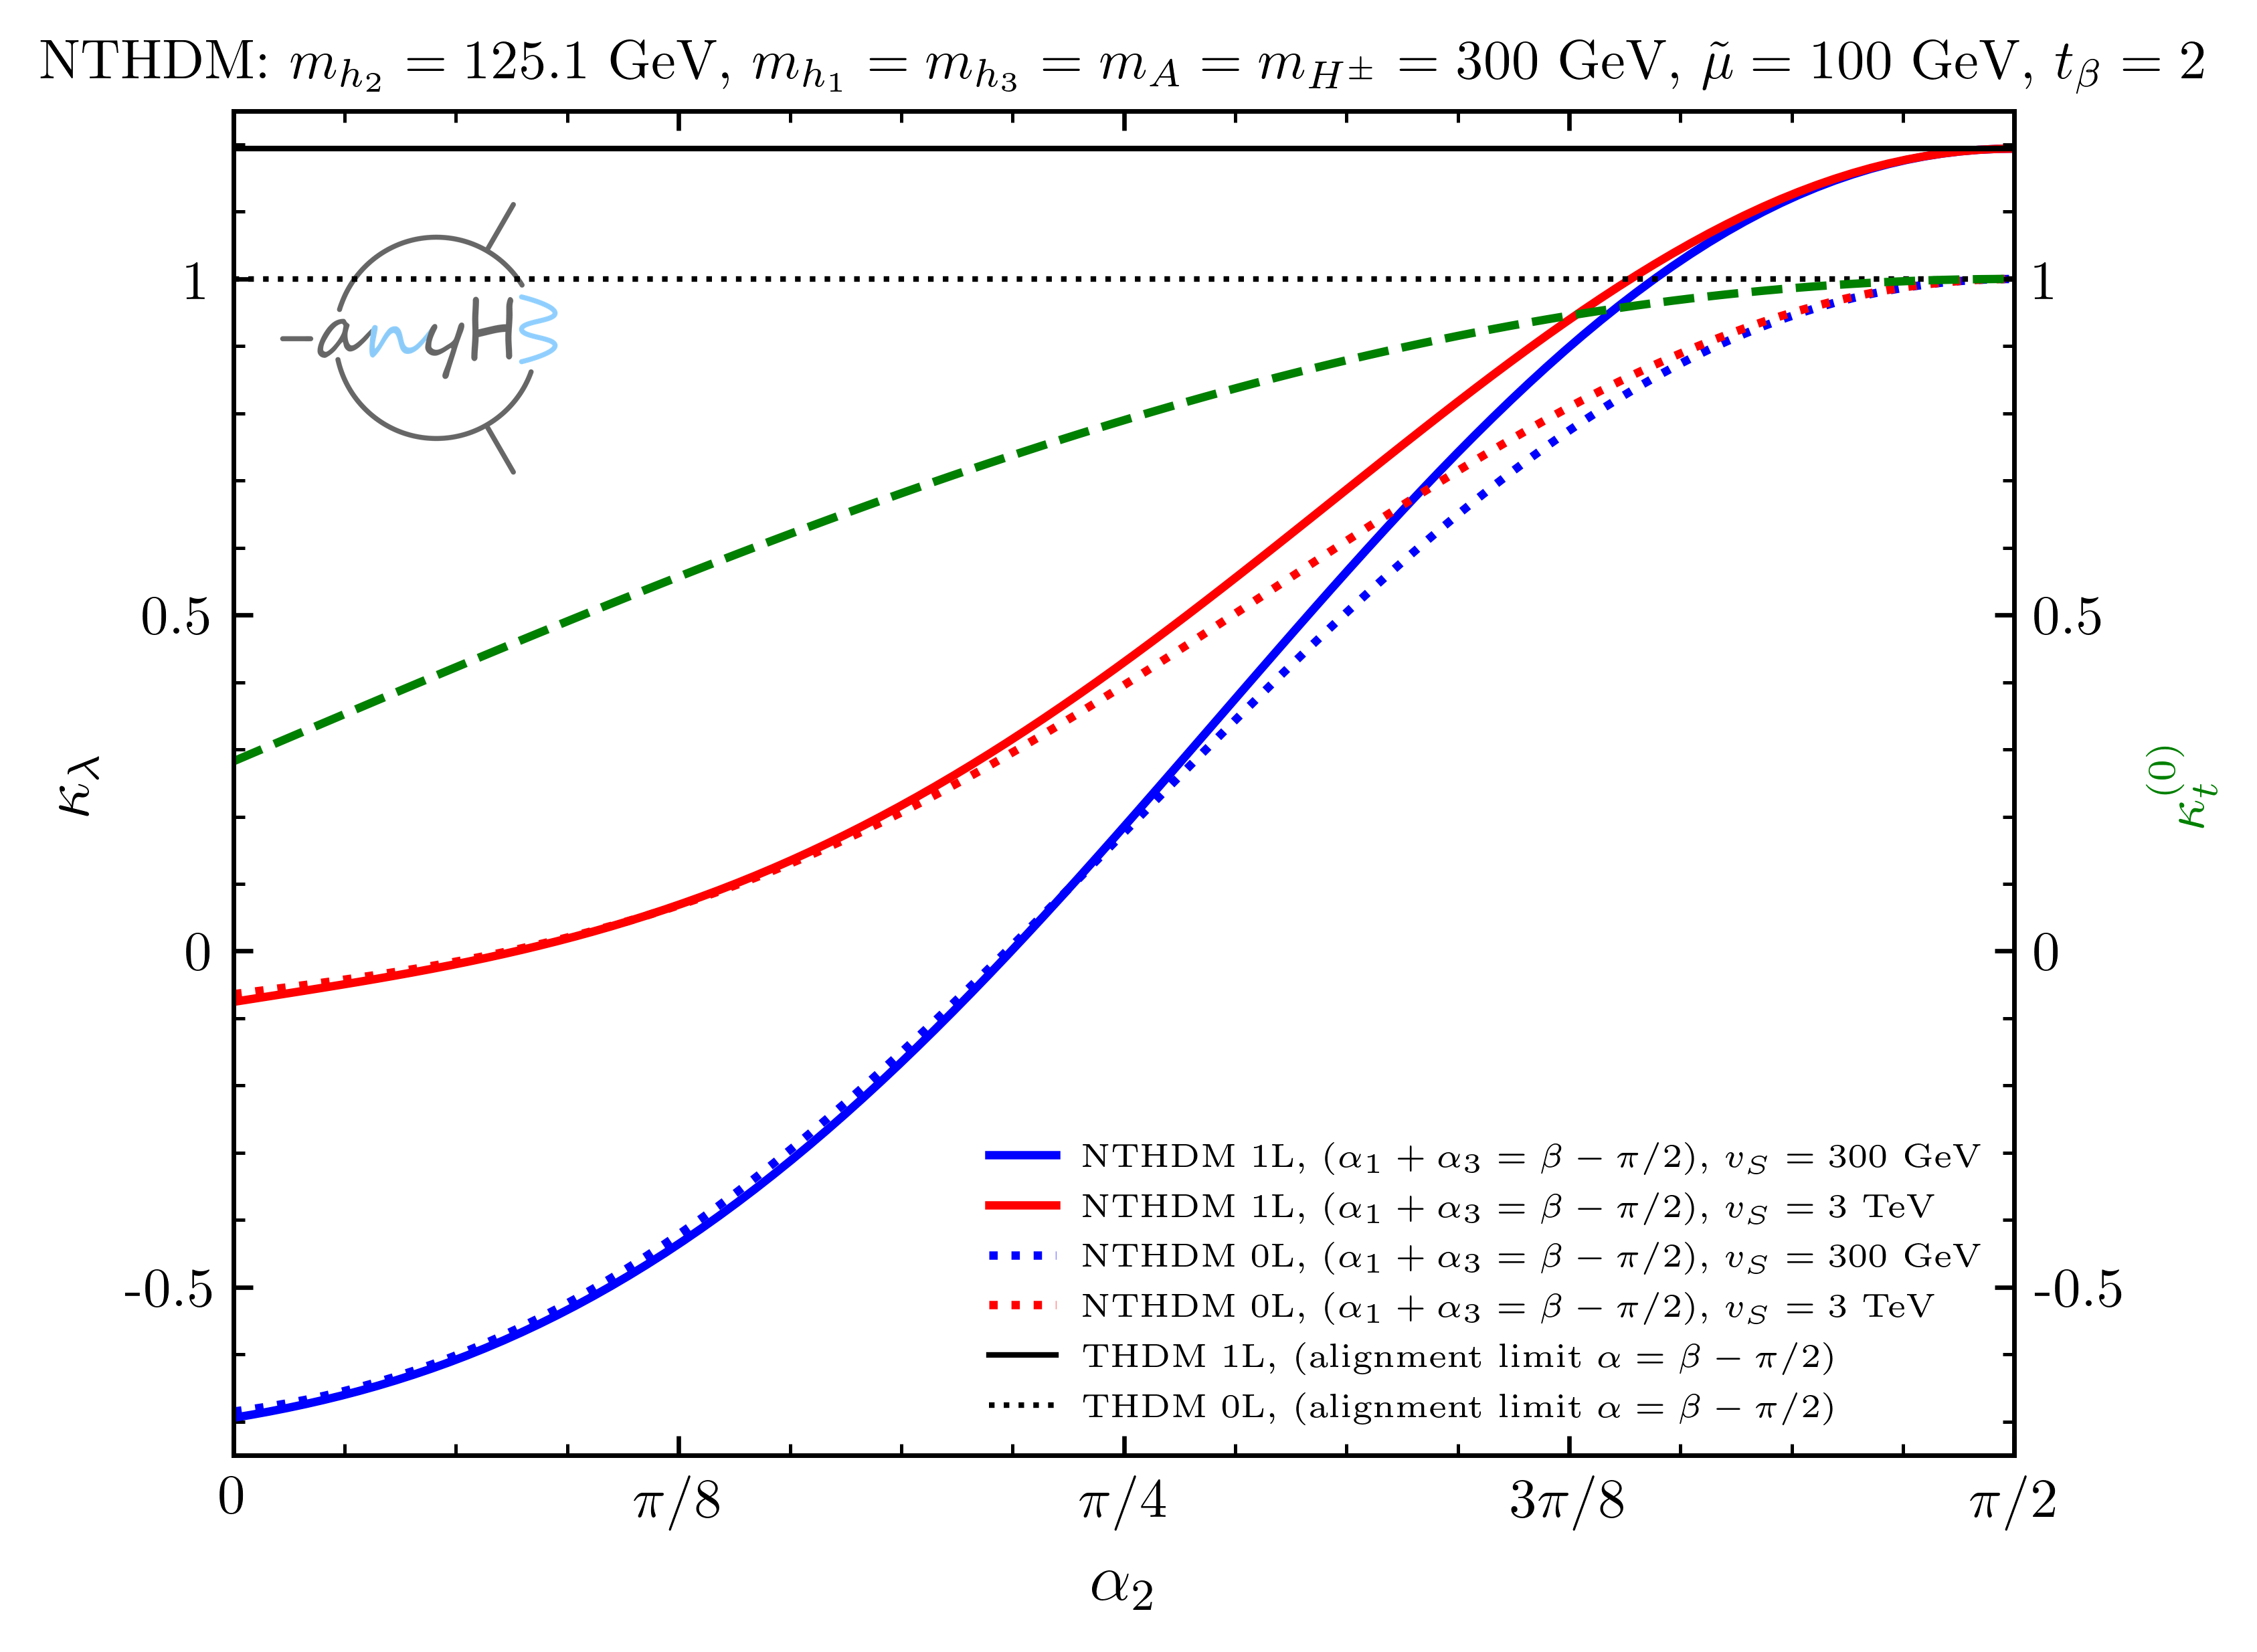

In [12]:
fig, ax = plt.subplots(1,1,constrained_layout=True, figsize=(5.5,4))
fig.dpi=600
plt.plot(a2val,kappalampt1.transpose()[0],c='blue',label=r'NTHDM 1L, ($\alpha_1+\alpha_3=\beta-\pi/2$), $v_S=300$ GeV')
plt.plot(a2val,kappalampt2.transpose()[0],c='red',label=r'NTHDM 1L, ($\alpha_1+\alpha_3=\beta-\pi/2$), $v_S=3$ TeV')
plt.plot(a2val,kappalampt1.transpose()[1],c='blue',ls=':',label=r'NTHDM 0L, ($\alpha_1+\alpha_3=\beta-\pi/2$), $v_S=300$ GeV')
plt.plot(a2val,kappalampt2.transpose()[1],c='red',ls=':',label=r'NTHDM 0L, ($\alpha_1+\alpha_3=\beta-\pi/2$), $v_S=3$ TeV')
ax.axhline(y=kappalam2HDM,xmin=0,xmax=np.pi/2,color='black',lw=1,label=r'THDM 1L, (alignment limit $\alpha=\beta-\pi/2$)')
ax.axhline(y=1,xmin=0,xmax=np.pi/2,color='black',lw=1,ls=':',label=r'THDM 0L, (alignment limit $\alpha=\beta-\pi/2$)')
ax.legend(loc="lower right",fontsize=6,frameon=False)
ax.set_xlabel(r'$\alpha_2$',fontsize=12)
ax.set_ylabel(r'$\kappa_\lambda$',fontsize=12)
ax.set_xticks([0,np.pi/8,np.pi/4,3*np.pi/8,np.pi/2])
ax.set_xticklabels(['0',r'$\pi/8$',r'$\pi/4$',r'$3\pi/8$',r'$\pi/2$'])
ax.set_yticks([-0.5,0,0.5,1])
ax.set_yticklabels(['-0.5','0','0.5','1'])
ax.set_ylim(-0.75,1.25)

ax2=ax.twinx()
ax2.plot(a2val,kappat,c='green',ls='--',label=r'N2HDM $\kappa_t^{(0)}$')
ax2.set_ylabel(r'$\kappa_t^{(0)}$',c='green')
ax2.set_ylim(-0.75,1.25)
ax2.set_yticks([-0.5,0,0.5,1])
ax2.set_yticklabels(['-0.5','0','0.5','1'])

ax.set_title(r'NTHDM: $m_{h_2}=125.1$ GeV, $m_{h_1}=m_{h_3}=m_A=m_{H^\pm}=300$ GeV, $\tilde{\mu}=100$ GeV, $t_\beta=2$',fontsize=10)
ax.set_xlim(0,np.pi/2)

plotting.place_logo(fig,0.12,0.72, resize=0.3, alpha=0.6, logo_name='anyH3_logo_large.png')

#plt.show()
plt.savefig("./NTHDM_kappalamvsalpha2.pdf", bbox_inches='tight', dpi=fig.dpi)